



What is the best shape for micro-scale flows, and how should these shapes be packed together into a porous structure to optimise adsorptive processes, or indeed other processes?

This question, or variants of it have been investigated from many different perspectives for more than 100 years. Is there anything new that can be said, or shown?

With the design requirements for the overall system established in the previous section, attention naturally turns to nature of the flows inside the porous structure, and there are many competing paradigms for layout:
 - Common Porous Materials: Randomly packed beds of spheres, thin laminates stacked together, monoliths, foam etc.
 - Microchannels: Tiny channels in plates of different dimensions (nm to cm), which may include porous material
 - Biological Designs: Branching networks of smaller and smaller tubes in an artery/vein or ladder layout
 - Other Shape Designs: Tubes, straws, trusses, triply periodic minimal surfaces etc.

Any new investigation would need some approach to unifying these diverse layout paradigms, and a method to comparing them in depth, across extensive variations. But where to start?

The approach one takes to defining the smallest scale, constrains the possible shapes and packing layout that can be used. The first question to consider is "what defines the smallest scale in a porous structure?"



# Background - Size and Layout

In order to unify the different shape and layout paradigms a series of bounds are needed to reduce the set of alternatives, from infinite down to a solvable number of variations. Further, these bounds must form the foundation around which a classification and configuration scheme can then be established. 

The inital bounds are defined by the rather extreme design constraints, chosen to throw the performance impact of shape into high relief:

 - Stokes Flow Regime: The overall system velocity $ (U _0 = 1 m/s) $ produces laminar flow
 - Tiny Pressure Drop: The velocity is driven by $ \Delta P = 10 kPa $, over system length of $L = 500 mm$
 - Fast Diffusion Speed: The diffusion time is $ 1/10^{th} $ of the residence time $(t _{diff} = \frac {t _{res}}{10} $
 - Fast Thermal Swing: Swing of $t _{swing} = 5 secs $ between minimum $(T _1 = 308 K)$ and maximum $(T _2 = 368 K)$ (NB. This bound is not considered in this section)

However, these constraints alone are insufficient to reduce the potential number of different shapes, and some additional rules must be set. 

The idea of a terminal scale, where adsorption takes place, or a shape dimension based on manufacturing or economic limits is common one. Each of the previous studies have been based on some fixed micro-scale, usually based on some rationale or limitation. 

The open question lies in the choice of rationale for this minimum dimension. It is obviously advantageous for the designer if it is based on some performance criteria, rather than based on manufacturing constraints, or conventional practice. 

But, what is the best way of defining the minimum size of any shape for the system under study?


## Pressure-Driven Flows
One of the key constraints of this study is the extremely low pressure drop of the porous structure, where convection flow through the entire system (assumed length = 500mm) is driven by only 10 kPa presure drop. So 

$$ (\frac{\Delta P}{L}) _{constraint} = 20 \frac{kPa}{m} $$

### Bulk Flow Through the System
#### Darcy's Law
The pressure drop is the driving potential for convection flow through the entire system, while a high fluid viscosity $(\mu)$ and low permeability $(\kappa _{sys})$ are the resistance, and the balance of forces moderates the volumetric flow $(q)$ through the system cross-sectional area $(A)$. This relation is known as Darcy's Law.

$$\frac{\Delta P}{L} = \frac{\mu}{\kappa} \cdot q \cdot \frac{1}{A}$$

The volumetric flow is the overall system velocity $(U _0)$ multiplied by the cross-sectional area

$$q = U _0 * A$$

Given that the overall system velocity target is $U _0 = 1 m/s$, and the dynamic viscosity of air is taken as $\mu _{a} = 1.846 \cdot 10^{-5} Pa \cdot s$, then the system permeability $(\kappa _{sys})$ is

$$ \kappa _{sys} = 9.23 \cdot 10^{-10} m^2 \notag $$

But this high-level, macro-level description about how flow through a system is mediated by a trade-off between driving force and resistance, says little about the shapes inside the system.

### Micro Flow Through a Circular Tube
#### Hagen Poisueille Law
At the micro-scale, inside the system, the structure could be modelled as pressure-driven flow through a circular tube. 


The Hagen Poisueille Law shows that the relation between the volumetric flow rate $q _1$, of a fluid with viscosity $\mu$ driven by a pressure drop $\Delta P$, through a tube of radius $r _1$ and length $L _1$ is

$$q _1 = \frac{\Delta P \cdot \pi \cdot r _1 ^4}{8 \cdot \mu _a \cdot L _1}$$

From Eqn. (4) it can be seen that volumetric flow $q _1$, is proportional to the $4^{th}$ power of the tube radius $r _1$. Given that the pressure drop constraint is known on a per metre basis, eqn. (1) can be applied in place of the actual tube length and pressure drop. Then, combining eqns. (1), (3) and (4) with the area of a circle $(A = \pi \cdot r^2)$, gives the average velocity in the tube

$$ v _1 = r _1 ^2 \cdot \frac{1}{8 \cdot \mu _a} \cdot \left(\frac{\Delta P}{L}\right) _{constraint} $$

From Eqn. (5) it can be seen that at all scales within the porous structure, the average velocity in any tube is proportional to the square of its radius. This relationship is shown in the chart below.


In [37]:
# Authenticate and Import the Plotting Environment
import plotly 
plotly.tools.set_credentials_file(username='cloudbrett', api_key='LZldvxB8CI3GaaKBEGED')

import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

# calculate velocities and radii for PD = 20kPa/m
Terms = 10
A = np.arange(0,Terms)
rMaxE = -3
rMinE = -8
rExp = rMinE + (A/Terms)*(rMaxE-rMinE)
r_1 = 1* np.float_power(10,rExp) 
muExp = -5
mu = 1.846 * np.float_power(10,muExp)    # mu of air
pd = 20000                               # 20kPa/m
v_1 = (pd/(8*mu)) * np.float_power(r_1,2) 
r0 = np.sqrt((8*mu)/pd) 
r_0 = r_1.copy()
r_10 = r_0.fill(r0)
v_sys = v_1.copy()
v_1sys = v_sys.fill(1.0)

# Setup the Colours
blue = 'rgb(68, 114, 196)'    # Velocity
black = 'rgb(0,0,0)'          # V=1.0 m/s
red = 'rgb(192, 0, 0)'        # r at V=1.0m/s
yellow = 'rgb(255, 192, 0)'   # N=3, length to radius ratio
brown = 'rgb(210,105,30)'     # N=100

# setup lines
line0 = dict( # Pressure Line
    color = (blue),
    width = 2
)
line1 = dict( # V=1m/s
    color = (black),
    width = 2
)
line2 = dict( # diameter at V=1m/s
    color = (black),
    width = 2,
    dash = 'dash'
)



# setup traces
trace0 = go.Scatter(
    x = r_1,
    y = v_1,
    mode = 'lines',
    name = 'System Pressure Drop',
    line = line0
)
trace1 = go.Scatter(
    x = r_1,
    y = v_sys,
    mode = 'lines',
    name = 'System Average Velocity',
    line = line1
)
micron = r0 * 1000000
mylabel = f'r = {micron:.2f} micron'
trace2 = go.Scatter(
    x = r_0,
    y = v_1,
    mode = 'lines',
    name = mylabel,
    line = line2
)

data = [trace0, trace1, trace2]

# setup the chart layout
layout = go.Layout(
    title = 'Velocity vs Tube Radius, for 20 kPa/m',
    xaxis=dict(
        title='Tube Radius (m)',
        type='log',
        showline=True,
        autorange=True
    ),
    yaxis=dict(
        title='Tube Velocity (m/s)',
        type='log',
        showline=True,
        autorange=True
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)





> *Fig. 2.2: Velocity vs Tube Radius for 20 kPa/m Pressure Drop (Blue line), Overall system*
> *velocity of 1m/s (Black line), Tube of System Length (500mm), r0 = 85.93 micron (Red line)*

Figure 2.2 demonstrates that the system pressure drop can drive convective flow at the Overall System Velocity of 1 m/s down a tube of suprisingly small radius, $r _0 = 85.93 \mu m$, which is a candidate for the smallest dimension of the system.

A second conclusion that can be drawn from Fig. 2.2 is that a pressure drop will force convective flow down even the smallest tube. At first glance this observation seems unimportant, since the size of the tube that produces the average system velocity is known.

However, an average system velocity, implies zones of lower and higher velocities that add up to the desired average, and this concept applies at every scale (e.g. micro, meso, macro). Thus, combining both larger and smaller tubes at various scales to produce the overall system velocity still remains interesting.

#### Radial Peclet Number - Biological Design

Some classes of porous structures are inpsired by biological branching flow schemes (e.g. arteries and veins), and are proposed to offer advantages (lower pressure drop for a given volumetric flow than straight tubes). In this scheme, the branching serves to both split the flows so they can be distributed to irrigate the volume, and slow the flows at the terminal tubes (e.g. capilliaries) so adsorption can occur preferentially, before the spent flows are regathered.

The radial Peclet Number $(Pe _r)$ is a non-dimensional number providing the ratio of convective transport to the diffusive transport from the centreline to the wall through distance $r _1$. 

$$ Pe _r = \frac{v _1 \cdot r _1}{D _m}$$

Popularised by Bejan (**cite**), the rationale is that when the radial Peclet Number is equal to 1, $(Pe _r = 1)$, then fluid "packets" from the centreline have diffused to the wall and therefore the full adsorptive value of the flow stream has been utilised. In short, the residence time of the fluid in the tube is equal to the diffusive time from the centreline to the wall.

$$ v_{1Pe_r} = \frac {D_m}{r _1} $$

#### Axial Peclet Number - Smallest Relevant Tube
Another approach is to consider the axial Peclet Number $(Pe _a)$, which is the ratio of the convective and diffusive velocities along the length of the tube. 

$$ Pe_a = \frac {v _1 \cdot L _1}{D_m}$$

Since the micro tube under study is somewhere in the midst of the system, its length $(L _1)$ is unkown. However, in some systems, the length of the tube is related to an integer number of diameters, for example in the lung this ratio is uniformly N=3 across all sizes of tubes (cite), whereas in engineering a hydrodynamic entrance length of N=10 is assumed. 

Introducing this length to diameter ratio $(N)$, and making the assumption that the smallest tube of interest to the convective flow designer, is the one where the convective velocity is equal to the diffusive velocity (ie. $Pe = 1$)

$$ v_{1Pe_a} = \frac {D_m}{2 \cdot N \cdot r _1} $$

The rationale for this concept is that there is no point the convective designer building anything smaller, as diffusion will be faster than pressure-driven flows, so is a true minimum. For comparison purposes, two different size ratios are chosen to highlight the differences between short, fast, fat tubes (N=3), and long, slow, skinny tubes (N=100). The molecular diffusion of methane is taken as $D_m = 1.02 \cdot 10^{-5} m^2/s$

These results can be seen in the chart below.

In [38]:
# setup lines for the Peclet numbers
line3 = dict( # V_pe
    color = (yellow),
    width = 2
)
line4 = dict( # radius at v_pe
    color = (yellow),
    width = 2,
    dash = 'dash'
)
line5 = dict( # V_pea3
    color = (brown),
    width = 2
)
line6 = dict( # radius at v_pea3
    color = (brown),
    width = 2,
    dash = 'dash'
)
line7 = dict( # v_pea100
    color = (red),
    width = 2
)
line8 = dict( # radius at v_pea100
    color = (red),
    width = 2,
    dash = 'dash'
)

# Radial Peclet Number
Dm = 1.02 * np.float_power(10,-5)
v_per = Dm/r_1
trace3 = go.Scatter(
    x = r_1,
    y = v_per,
    mode = 'lines',
    name = 'Radial Peclet Number',
    line = line3
)
rper = np.float_power(((Dm * 8 * mu)/(pd)),(1/3))
r_per = r_1.copy()
r_per1 = r_per.fill(rper)
micron = rper * 1000000
mylabel = f'r = {micron:.2f} micron'
trace4 = go.Scatter(
    x = r_per,
    y = v_1,
    mode = 'lines',
    name = mylabel,
    line = line4
)

# Axial Peclet Number (N=3)
v_pea3 = Dm/(2*3*r_1)
trace5 = go.Scatter(
    x = r_1,
    y = v_pea3,
    mode = 'lines',
    name = 'Axial Peclet (Short, N=3)',
    line = line5
)
rpea3 = np.float_power(((Dm * 8 * mu)/(pd*2*3)),(1/3))
r_pea3 = r_1.copy()
r_pea31 = r_pea3.fill(rpea3)
micron = rpea3 * 1000000
mylabel = f'r = {micron:.2f} micron'
trace6 = go.Scatter(
    x = r_pea3,
    y = v_1,
    mode = 'lines',
    name = mylabel,
    line = line6
)


# Axial Peclet Number (N=100)
v_pea100 = Dm/(2*100*r_1)
trace7 = go.Scatter(
    x = r_1,
    y = v_pea100,
    mode = 'lines',
    name = 'Axial Peclet (Long, N=100)',
    line = line7
)
rpea100 = np.float_power(((Dm * 8 * mu)/(pd*2*100)),(1/3))
r_pea100 = r_1.copy()
r_pea1001 = r_pea100.fill(rpea100)
micron = rpea100 * 1000000
mylabel = f'r = {micron:.2f} micron'
trace8 = go.Scatter(
    x = r_pea100,
    y = v_1,
    mode = 'lines',
    name = mylabel,
    line = line8
)



data2 = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]
fig = go.Figure(data=data2, layout=layout)
py.iplot(fig)


> *Fig. 2.3: Velocity vs Tube Radius for 20 kPa/m Pressure Drop (Blue line), Overall system*
> *velocity of 1m/s (Black line), Tube of System Length (500mm), r = 85.93 micron (Back dashes),*
> *Velocity at Radial Peclet Number = 1 (Yellow line), r = 42.23 micron (Yellow dashes),*
> *Velocity at Axial Peclet Number = 1, Ratio of Diameter to Length N=3 (Brown line),*
> *r = 23.24 micron (Brown dashes),Velocity at Axial Peclet Number = 1, N=100 (Red line),*
> *r = 7.22 micron.*

For a system with a fixed pressure drop of $20 kPa/m$, Figure 2.3 shows that if the model of a micro-tube is taken, then there are four dimensions that 'naturally' fall out as potential minimum dimensions:

 * System Length Tube at Average System Velocity: $ r _{sys} = 85.93 \mu m$
 * Micro Tube at Biological Design Limit: $ r _{Pe _r = 1} = 42.23 \mu m$
 * Short Micro Tube, Smallest Useful Length: $ r _{Pe _a = 1} = 23.24 \mu m$
 * Long Micro Tube, Smallest Useful Length: $ r _{Pe _a = 1} = 7.22 \mu m$
 
#### Ideal Aspect Ratio - Minimise Characteristic SorptionTime

Another approach to minimum dimensions (cite Luo), is to minimise the average time required to sorb (adsorb or desorb) through the porous material, and diffuse down the tube length. This is particularly relelvant for $Pe _r = 1$ flow regime.

Consider the porous microtube, shown below in figure 2.4, with length $(L _1)$, radius $(r _1)$ and velocity $(v _1)$, with a Macroporous Domain of radius $(r _p)$ surrounding the tube.

Assume the gas is transported by surface diffusion, decribed by the diffusion coefficient $D _{Eff}$, and that it can be treated one dimensionally, as if all of the pores are radial. The diffusion coefficient of the gas along the tube length is described by $D _m > D_{Eff}$.

The characteristic time $(t _p)$ of the radial diffusion from some point $x$ inside the porous domain to the tube wall is

$$t_p = \frac{x^2}{D _{Eff}}$$

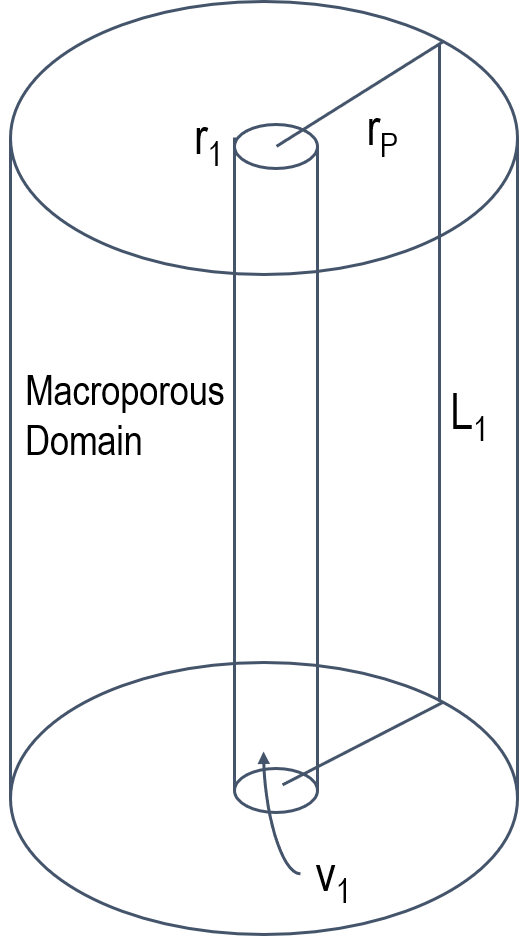

In [39]:
from IPython.core.display import Image
Image(filename="images\microtube.png", width =100, height =400)

> *Fig 2.4: The Smallest Useful Tube*
> *for Convection, where the axial*
> *Peclet Number = 1, with Velocity*
> *v1, radius r1, length L1,*
> *surrounded by a Macroporous*
>  *domain with radius r_p*

The average diffusion time through the porous material $(t _{p _{ave}})$ is obtained by integrating $t _p$ over the radial distance (the thickness of the tube is neglected for simplicity sake), and then dividing by that distance.

$$t _{p _{ave}} = \frac {1}{r_p} \cdot \frac {1}{D _{Eff}} \int_0^{r_p}x^2 dx = \frac {r_p^2}{3 \cdot D_{Eff}}$$

The average diffusion time along the tube can be obtained by integrating $t_1$ over the longitudinal distance $L_1$, and then dividing by that distance

$$t _{1 _{ave}} = \frac {1}{L_1} \cdot \frac {1}{D _{m}} \int_0^{r_1}y^2 dy = \frac {L_1^2}{3 \cdot D_{m}}$$

The characteristic time $(\tau)$ of a single desorption (or adsorption) step is the sum of the average diffusion time through the material and the average diffusion time down the tube.

$$\tau = t _{p _{ave}} + t _{1 _{ave}} = \left( \frac {r_p^2}{3 \cdot D_{Eff}} \right) + \left( \frac {L_1^2}{3 \cdot D_{m}} \right) $$

For any selected porous material, the effective diffusivity is fixed and therefore the volume of the porous material is fixed $(V_1 = \pi \cdot r^2 \cdot L_1)$. The aspect ratio of the irrigation volume $M = (L_1/r_p)$ that minimises the total characteristic time can be obtained by eliminating $r_o$ through the constant volume constraint, and then differentiating the total time with respect to $L_1$, (while checking the second derivative is positive).

$$\left( \frac{\partial \tau}{\partial L_1}\right) _{V_1} = \frac {V_1}{3 \cdot D_{Eff} \cdot L_1^2} + \frac {2 L_1}{3 \cdot d_m} = 0 $$

The optimal aspect ratio M is then dependent on the ratio of the diffusion coefficient of the tube to the diffusion coefficient of the porous material.

$$M = \frac{L_1}{r_p} = \sqrt{\frac{D_m}{2 \cdot D_{Eff}}}$$

The effective diffusion coefficient is taken to be $D_{Eff} = 1.02 * 10^{-5} m^2/s$, and thus the optimal aspect ratio of tubes with $Pe_a = 1$ is

$$M = \sqrt{\frac{D_m}{2 \cdot D_{Eff}}} = 8.3 $$

### Bulk Flow Through Circular Tubes

#### Circular Tubes - Absolute Permeability

The permeability of the porous system block, subjected to bulk flow driven by the pressure drop, can also be investigated using the Hagen Pouiseuille Law (Eqn. 4), by assuming that the pore space is constructed of N identical circular tubes at an angle $\alpha$ to its length (Fig. 2.5).

![title](images\blocktube.png)

> *Figure 2.5: The porous system block of length $L_{sys}$, has $N$ circular tubes embedded at an angle $\alpha$ to the horizontal. The tubes are either open pipes of radius $r_1$, or have an outer radius $r_1$ with a concentric core of radius $r_2$. *

Since the tubes are at an angle, then the length of each inside the block is

$$L_t = \frac {L_{sys}}{\sin \alpha} = L_{sys} \cdot \tau $$

where, $\tau = \sin^{-1}\alpha$ is the tortuosity. Combining Eqns. (4) and (17), the total flux through $N$ tubes is

$$q _{sys} = N\cdot q_1 = -N\frac{\pi r_1^4}{8 \mu}\frac{\Delta P}{L\tau} = -N\frac{\pi r_1^4}{8 \mu\tau}\frac{dP}{dx} = -N\pi r_1^2\tau \frac{r_1^2}{8 \mu\tau^2}\frac{dP}{dx}$$

where $\Delta P / L\tau$ is the pressure gradient across the tube.

The porosity of the block due to the tubes is

$$\phi _{sys} = \frac{N\pi r_1^2 L_t}{A L} = \frac{N\pi r_1^2 \tau}{A}$$

where A is the cross sectional area of the block. Combining eqns. (18) and (19) gives

$$q _{sys} = -\phi \frac{r_1^2}{8\tau^2} \frac{A}{\mu} \frac{d P}{d x} $$

Comparing Eqn. (20) with Darcy's Law Eqn. (2), gives the absolute permeability as

$$ k_{absolute} = r_1^2 \frac{\phi}{8\tau^2}$$

The Specific Surface Area $(S)$ is the ratio of the pore surface area to the volume of the block, so for $N$ tubes

$$ S = \frac{N2\pi r_1 L_{\tau}}{A L} = \frac{N2\pi r_1 \tau}{A} = \frac{N2\pi r_1^2 \tau}{A} \frac{2}{r_1} = \frac {2\phi}{r_1} $$

and, therefore $r_1 = 2\phi / s$ and

$$ k_{absolute} = \frac {1}{2} \frac{\phi}{S^2\tau^2}$$

Finally, combining Eqns. (2) and (18) gives

$$ k_{absolute} = \frac {N}{A \tau} \frac{\pi r_1^4}{8}$$

#### Concentric Tube - Absolute Permeability 

The equation for laminar viscous flow in a tube of radius $r_1$ is

$$\frac{\partial^2 v_1}{\partial r^2} + \frac {1}{r_1} \frac{\partial u}{\partial r_1} = \frac {1}{\mu} \frac {dP}{dx} $$

where $v_1$ is the velocity of the fluid in the axial (x) direction. A general solution of Eqn (25) is

$$ u = \tilde{A} + \tilde{B} r_1^2 + \tilde{C}ln r_1 $$

where $\tilde{A}, \tilde{B}$, and $\tilde{C}$ are constants. It follows from Eqn. (26) that

$$ \frac{\partial u}{\partial r_1} = s \tilde{C} r_1 + \frac{\tilde{C}}{r_1},    \frac {\partial^2 u}{\partial r_1^2} = 2 \tilde{C} - \frac{\tilde{C}}{r_1^2} $$

By substituting the expressions from Eqn (27) into Eqn (25) then,

$$ 2\tilde{B} - \frac{\tilde{C}}{r_1^2} + 2\tilde{B} + \frac{\tilde{C}}{r_1^2} = \frac {1}{\mu} \frac {dP}{dy} $$

which means that

$$ \tilde{B} = \frac {1}{4\mu} \frac{dP}{dx}$$

To avoid singularity at $r_1 = 0$, assume that $\tilde{C} = 0$, and there is a no-slip $(v_1 = 0)$ boundary condition at $r = r_1$ the outside radius and $r = r_2$ the inside radius, then

$$v_1 = -\frac{1}{4 \mu} \frac{dP}{dx} r_2^2 \left \lbrack  \left( 1 - \frac{r^2}{r_2^2} \right) - \left(1 - \frac{r_1^2}{r_2^2} \right ) \right \rbrack  \frac{\ln (r_2/r)}{\ln (r_2/r_1)} $$


A comparison of the velocity for the two configurations is given below.

### Bulk Flow Through Packed Shapes


## Stokes Flow
### Drag on Shapes

### Flow through fibres

## Summary

# Introduction